In [1]:
import os
import pickle
import shutil
import warnings
import random as r
import numpy as np
import pandas as pd
import seaborn as sns

# Matplotlib Imports
import matplotlib  
import matplotlib.pyplot as plt
matplotlib.use(u'nbAgg')
%matplotlib inline

import multiprocessing
from multiprocessing import Process

# This is used for file operations
import codecs  

In [4]:
data_path = "malware-classification"

byte_destination = os.path.join(data_path, 'doc_dataset')
test_destination = os.path.join(data_path, '006')

In [5]:
files = os.listdir(test_destination)

if not os.path.isdir(byte_destination):
    os.makedirs(byte_destination)

for file in files:
    if(file.endswith(".doc")):
         shutil.move(os.path.join(test_destination, file), byte_destination)

In [ ]:
#utilities cells

In [20]:
files = os.listdir(byte_destination)
filenames = []
array = []
for file in files:
    if(file.endswith("doc")):
         os.remove(os.path.join(byte_destination, file))

In [3]:
N = 0 #Total count of number of files in all directories
# what is this supposed to be?
# N_c = 0 #Number of documents in each class

for dirpath, dirnames, filenames in os.walk("021"):
    N += len(filenames)
    print("Files in", dirpath, len(filenames))

print("Total files", N)

Files in 021 985
Total files 985


In [13]:
import os, shutil, sys 

def move_to_root_folder(root_path, cur_path):
    for filename in os.listdir(cur_path):
        if os.path.isfile(os.path.join(cur_path, filename)):
            shutil.move(os.path.join(cur_path, filename), os.path.join(root_path, filename))
        elif os.path.isdir(os.path.join(cur_path, filename)):
            move_to_root_folder(root_path, os.path.join(cur_path, filename))
        else:
            sys.exit("Should never reach here.")
    # remove empty folders
    if cur_path != root_path:
        os.rmdir(cur_path)
        
move_to_root_folder('C:\\Users\\Razaq\\Jupyter\\statistical', 'C:\\Users\\Razaq\\Jupyter\\statistical')

In [ ]:
files = os.listdir(byte_destination)

for file in files:
    if(file.endswith("_exe")):   
        os.remove(os.path.join(byte_destination, file))

In [ ]:
#using those upper cells for utility purposes

In [6]:
files = os.listdir(byte_destination)
filenames = []
array = []
for file in files:
    
    if(file.endswith("doc")):
    
        file = file.split('.')[0]
        text_file = open (os.path.join(byte_destination, file) + ".txt", 'w+')
    
        try:
            with open(os.path.join(byte_destination, file) + ".doc", "rb") as fp:
        
                content = fp.read().hex()
                content = content[4:-4]
                values = [content[i:i+2] for i in range(0,len(content), 2)]
        
                for line in values:
                    text_file.write(line)
                    text_file.write(" ")
        
                fp.close()
                #os.remove(os.path.join(byte_destination, file) + ".doc")
            
        except OSError as e:
            print('Error:', e)
            continue
            
        text_file.close()

In [7]:
files = os.listdir(byte_destination)
filenames2 = []
feature_matrix = np.zeros((len(files), 257),dtype=int)
k = 0

# Program to convert into bag of words of bytefiles
# This is custom-built bag of words this is unigram bag of words
byte_feature_file = open('doc.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")

byte_feature_file.write("\n")

for file in files:
    filenames2.append(file)
    byte_feature_file.write(file + ",")
    if(file.endswith("txt")):
        try:
            with open(os.path.join(byte_destination, file), "r") as byte_file:
                for lines in byte_file:
                    line = lines.rstrip().split(" ")
                    for hex_code in line:
                        if hex_code == '??': feature_matrix[k][256] += 1
                        else: feature_matrix[k][int(hex_code,16)] += 1
            byte_file.close()
        except OSError as e:
            print('Error:', e)
            continue
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i) + ",")
    byte_feature_file.write("\n")
    k += 1

byte_feature_file.close()

In [74]:
byte_features = pd.read_csv("xls.csv", sep=",", index_col=False)

byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features = byte_features.drop("??", 1)


byte_features.head()


C:\Users\Razaq\AppData\Local\Temp\ipykernel_21444\418908139.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  byte_features = byte_features.drop("??", 1)


,ID,0,1,2,3,4,5,6,7,8,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
0,000030,3386171,93936,97982,50523,54115,72022,49954,49803,93833,...,2594,2349,2689,2425,3366,2443,2570,441736,2989,47560
1,000031,886843,53868,104099,28985,27957,2597,3181,2625,28441,...,782,778,975,725,756,722,829,51057,766,27389
2,000032,12078878,72370,73073,56711,56705,56712,71814,71929,72047,...,8071,8091,8110,8088,8399,8068,8049,1946879,8112,65684
3,000033,1664983,42701,156226,91359,23879,37636,20950,22932,168155,...,5747,1846,8327,3757,1656,4652,3327,61139,2900,18638
4,000034,5967784,193550,117216,71332,62964,71865,23235,280194,81645,...,5237,4572,8628,5167,262261,4057,5956,514277,5710,55766


In [24]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [25]:
df1 = normalize(byte_features)

#df1 = byte_features

In [26]:
df1.loc['total'] = byte_features.select_dtypes(pd.np.number).sum()

df1 = df1.replace(np.nan, 'total', regex=True)

df1.tail()

C:\Users\Razaq\AppData\Local\Temp\ipykernel_22912\388508820.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df1.loc['total'] = byte_features.select_dtypes(pd.np.number).sum()


,ID,0,1,2,3,4,5,6,7,8,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
717,zorua,0.037736,0.076923,0.166667,0.06,0.20,0.350,0.322034,0.277778,0.312500,...,0.305556,0.188679,0.264706,0.236842,0.228571,0.380952,0.333333,0.256410,0.184211,0.269231
718,zubat,0.000000,0.057692,0.142857,0.08,0.10,0.175,0.152542,0.166667,0.520833,...,0.111111,0.132075,0.235294,0.263158,0.200000,0.190476,0.277778,0.307692,0.157895,0.096154
719,zweilous,0.084906,0.211538,0.452381,0.24,0.46,0.375,0.338983,0.555556,0.437500,...,0.416667,0.377358,0.411765,0.236842,0.342857,0.428571,0.305556,0.282051,0.236842,0.250000
720,zygarde-50,0.443396,0.692308,0.595238,0.40,0.50,0.375,0.457627,0.361111,0.312500,...,0.416667,0.528302,0.705882,0.421053,0.428571,0.404762,0.666667,0.410256,0.710526,0.615385
total,total,37412.000000,9679.000000,9262.000000,7803.00,11253.00,8859.000,9149.000000,7435.000000,11455.000000,...,7789.000000,9552.000000,7900.000000,7950.000000,7263.000000,8857.000000,8449.000000,8035.000000,7997.000000,11327.000000


C:\Users\Razaq\AppData\Local\Temp\ipykernel_22912\3815500344.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


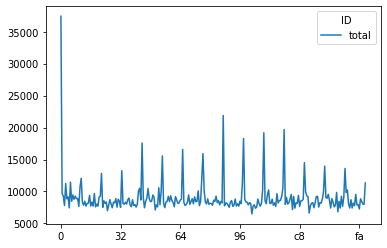

<Figure size 432x288 with 0 Axes>

In [27]:
df1.query('ID == "total"').set_index('ID').T.plot()
fig = plt.figure()
fig.canvas.manager.full_screen_toggle() # toggle fullscreen mode
fig.show()

In [25]:
#df_plot = pd.DataFrame(df1)
df_plot = df1.drop('ID', axis=1)
df_plot = df_plot.iloc[[-1]]
df_plot.head()

,0,1,2,3,4,5,6,7,8,9,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
0,8978626.0,3373908.0,2897366.0,3195850.0,3233464.0,2873864.0,2682027.0,3143194.0,3056032.0,3104613.0,...,2894078.0,2836444.0,2669568.0,2772320.0,3065915.0,2847527.0,2772409.0,2860630.0,2790598.0,3014370.0


In [52]:
import itertools
def split_dict(x, chunks):      
    i = itertools.cycle(range(chunks))       
    split = [dict() for _ in range(chunks)]
    for k, v in x.items():
       
        split[next(i)][k] = v
       
    return split

In [54]:
data = df_plot.iloc[0].to_dict()
test = split_dict(data, 8)
print(test)

[{'0': 8978626.0, '8': 3056032.0, '10': 2672044.0, '18': 2837395.0, '20': 3647785.0, '28': 2887625.0, '30': 2597152.0, '38': 3148673.0, '40': 2897022.0, '48': 3722523.0, '50': 3176069.0, '58': 3074305.0, '60': 2692743.0, '68': 2794715.0, '70': 3006081.0, '78': 2767961.0, '80': 2870460.0, '88': 2750912.0, '90': 3372728.0, '98': 2780473.0, 'a0': 2788820.0, 'a8': 3599704.0, 'b0': 2808853.0, 'b8': 3242802.0, 'c0': 2701606.0, 'c8': 3030489.0, 'd0': 2489820.0, 'd8': 2908308.0, 'e0': 2679742.0, 'e8': 2329821.0, 'f0': 2498267.0, 'f8': 2669568.0}, {'1': 3373908.0, '9': 3104613.0, '11': 2840011.0, '19': 2969503.0, '21': 2862421.0, '29': 3617798.0, '31': 3077077.0, '39': 3123251.0, '41': 3119508.0, '49': 4143466.0, '51': 3340766.0, '59': 3096178.0, '61': 2795550.0, '69': 3630796.0, '71': 3440208.0, '79': 3022158.0, '81': 2724601.0, '89': 2921551.0, '91': 3363241.0, '99': 2895111.0, 'a1': 2856955.0, 'a9': 3904068.0, 'b1': 3144530.0, 'b9': 3162690.0, 'c1': 2670637.0, 'c9': 3146004.0, 'd1': 2622710.

In [57]:
from itertools import islice

def chunks(data, SIZE=10000):
    it = iter(data)
    for i in range(0, len(data), SIZE):
        yield {k:data[k] for k in islice(it, SIZE)}

{'0': 8978626.0, '1': 3373908.0, '2': 2897366.0, '3': 3195850.0, '4': 3233464.0, '5': 2873864.0, '6': 2682027.0, '7': 3143194.0, '8': 3056032.0, '9': 3104613.0, '0a': 3156995.0, '0b': 2657491.0, '0c': 2829022.0, '0d': 2869838.0, '0e': 2934233.0, '0f': 2736084.0}


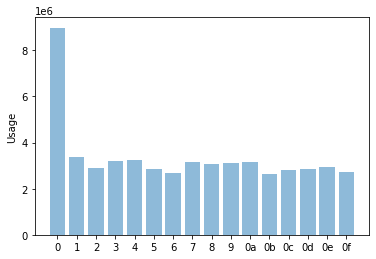

{'10': 2672044.0, '11': 2840011.0, '12': 3307748.0, '13': 2646178.0, '14': 3118221.0, '15': 3170162.0, '16': 2876048.0, '17': 2429098.0, '18': 2837395.0, '19': 2969503.0, '1a': 2904479.0, '1b': 3142136.0, '1c': 3301996.0, '1d': 3255793.0, '1e': 3034048.0, '1f': 2921807.0}


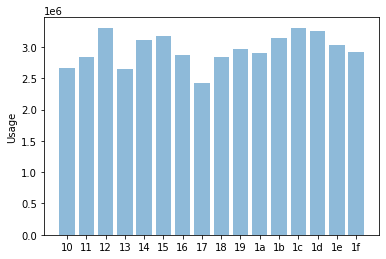

{'20': 3647785.0, '21': 2862421.0, '22': 2680551.0, '23': 3464830.0, '24': 4099156.0, '25': 3388516.0, '26': 2640437.0, '27': 3057099.0, '28': 2887625.0, '29': 3617798.0, '2a': 3818957.0, '2b': 3095084.0, '2c': 3066680.0, '2d': 3345387.0, '2e': 2930987.0, '2f': 2359128.0}


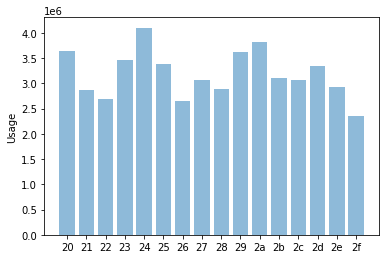

{'30': 2597152.0, '31': 3077077.0, '32': 3151956.0, '33': 2764517.0, '34': 2987152.0, '35': 3065957.0, '36': 3162187.0, '37': 2770768.0, '38': 3148673.0, '39': 3123251.0, '3a': 3177613.0, '3b': 3128830.0, '3c': 3238993.0, '3d': 3184193.0, '3e': 3036698.0, '3f': 2901190.0}


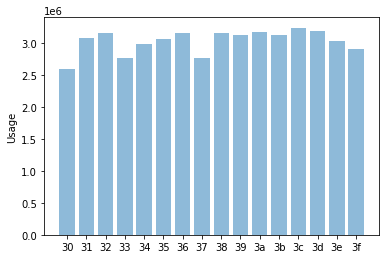

{'40': 2897022.0, '41': 3119508.0, '42': 2965385.0, '43': 2861576.0, '44': 2687857.0, '45': 3011090.0, '46': 3170372.0, '47': 3283477.0, '48': 3722523.0, '49': 4143466.0, '4a': 3896971.0, '4b': 3298934.0, '4c': 2893619.0, '4d': 3208380.0, '4e': 3206593.0, '4f': 3383160.0}


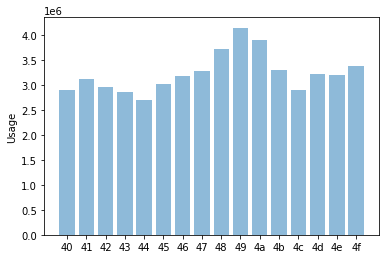

{'50': 3176069.0, '51': 3340766.0, '52': 4119218.0, '53': 3466972.0, '54': 3783949.0, '55': 3780439.0, '56': 3428422.0, '57': 2981960.0, '58': 3074305.0, '59': 3096178.0, '5a': 3530284.0, '5b': 3261669.0, '5c': 3044273.0, '5d': 2947606.0, '5e': 2643361.0, '5f': 2548286.0}


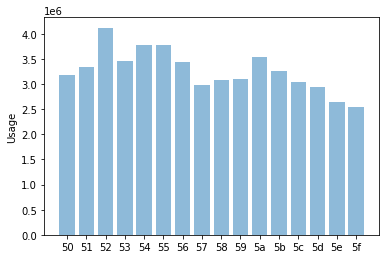

{'60': 2692743.0, '61': 2795550.0, '62': 2909088.0, '63': 3390024.0, '64': 3097409.0, '65': 3388774.0, '66': 2820969.0, '67': 2626051.0, '68': 2794715.0, '69': 3630796.0, '6a': 3449454.0, '6b': 3128473.0, '6c': 3043773.0, '6d': 3684752.0, '6e': 3400904.0, '6f': 2974172.0}


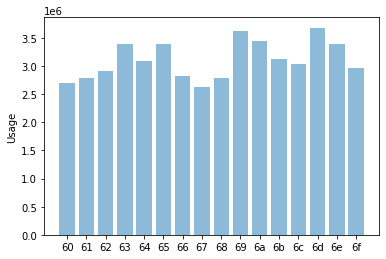

{'70': 3006081.0, '71': 3440208.0, '72': 3350439.0, '73': 3095755.0, '74': 2994177.0, '75': 3438982.0, '76': 3083323.0, '77': 2785747.0, '78': 2767961.0, '79': 3022158.0, '7a': 3020843.0, '7b': 2874993.0, '7c': 2668189.0, '7d': 3045351.0, '7e': 2844790.0, '7f': 2797851.0}


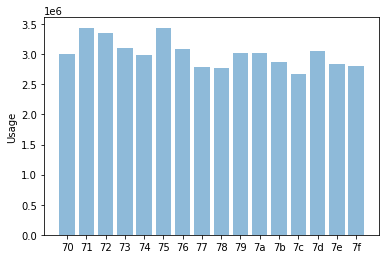

{'80': 2870460.0, '81': 2724601.0, '82': 3132061.0, '83': 2615422.0, '84': 2565342.0, '85': 2975553.0, '86': 2999200.0, '87': 2585129.0, '88': 2750912.0, '89': 2921551.0, '8a': 3149340.0, '8b': 2635956.0, '8c': 3077107.0, '8d': 3183649.0, '8e': 3619527.0, '8f': 3215546.0}


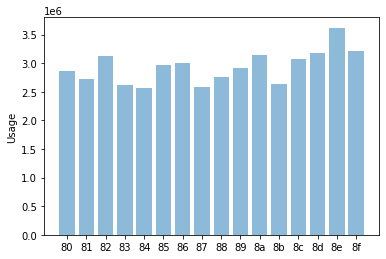

{'90': 3372728.0, '91': 3363241.0, '92': 4187774.0, '93': 3051108.0, '94': 3413169.0, '95': 3746865.0, '96': 3542056.0, '97': 2776702.0, '98': 2780473.0, '99': 2895111.0, '9a': 3124856.0, '9b': 2739016.0, '9c': 2924381.0, '9d': 2999565.0, '9e': 3347600.0, '9f': 2974519.0}


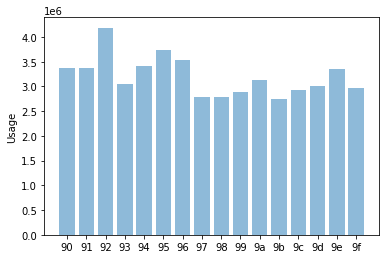

{'a0': 2788820.0, 'a1': 2856955.0, 'a2': 2998896.0, 'a3': 2947717.0, 'a4': 3700051.0, 'a5': 3804288.0, 'a6': 3440405.0, 'a7': 3532570.0, 'a8': 3599704.0, 'a9': 3904068.0, 'aa': 3712127.0, 'ab': 3299573.0, 'ac': 3049956.0, 'ad': 3444600.0, 'ae': 3127384.0, 'af': 2870966.0}


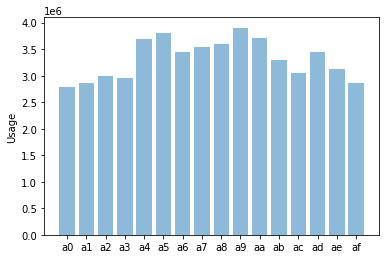

{'b0': 2808853.0, 'b1': 3144530.0, 'b2': 3138503.0, 'b3': 2617681.0, 'b4': 3320717.0, 'b5': 3498628.0, 'b6': 3485112.0, 'b7': 3447675.0, 'b8': 3242802.0, 'b9': 3162690.0, 'ba': 3102746.0, 'bb': 2725301.0, 'bc': 2545294.0, 'bd': 2708386.0, 'be': 2721192.0, 'bf': 2752753.0}


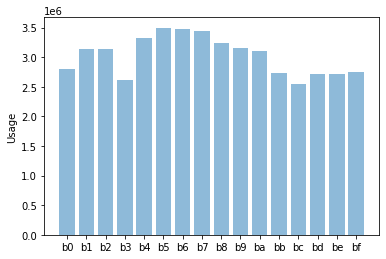

{'c0': 2701606.0, 'c1': 2670637.0, 'c2': 2646292.0, 'c3': 2800972.0, 'c4': 3050483.0, 'c5': 2800989.0, 'c6': 3131060.0, 'c7': 3593030.0, 'c8': 3030489.0, 'c9': 3146004.0, 'ca': 3273737.0, 'cb': 3017633.0, 'cc': 2794325.0, 'cd': 2672821.0, 'ce': 2724853.0, 'cf': 2958190.0}


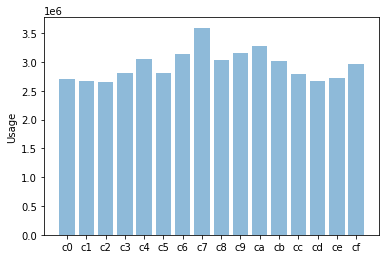

{'d0': 2489820.0, 'd1': 2622710.0, 'd2': 3459364.0, 'd3': 3531185.0, 'd4': 3754589.0, 'd5': 3249689.0, 'd6': 3095885.0, 'd7': 3027545.0, 'd8': 2908308.0, 'd9': 2676553.0, 'da': 3325478.0, 'db': 3657557.0, 'dc': 3355216.0, 'dd': 2871298.0, 'de': 2609250.0, 'df': 2925623.0}


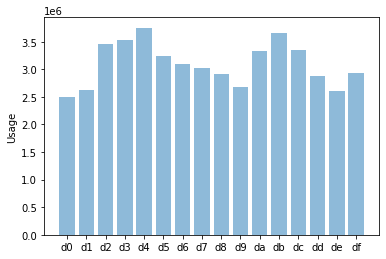

{'e0': 2679742.0, 'e1': 2754578.0, 'e2': 2942846.0, 'e3': 3439692.0, 'e4': 3140364.0, 'e5': 3090521.0, 'e6': 2677735.0, 'e7': 3115012.0, 'e8': 2329821.0, 'e9': 3445617.0, 'ea': 3545483.0, 'eb': 3011927.0, 'ec': 2628518.0, 'ed': 3320571.0, 'ee': 2919997.0, 'ef': 2661692.0}


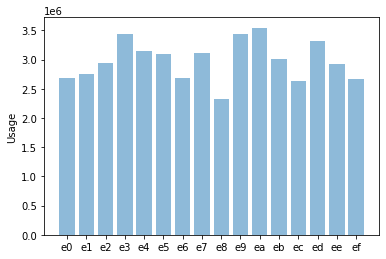

{'f0': 2498267.0, 'f1': 2962182.0, 'f2': 2992651.0, 'f3': 2771087.0, 'f4': 2914160.0, 'f5': 3187153.0, 'f6': 2894078.0, 'f7': 2836444.0, 'f8': 2669568.0, 'f9': 2772320.0, 'fa': 3065915.0, 'fb': 2847527.0, 'fc': 2772409.0, 'fd': 2860630.0, 'fe': 2790598.0, 'ff': 3014370.0}


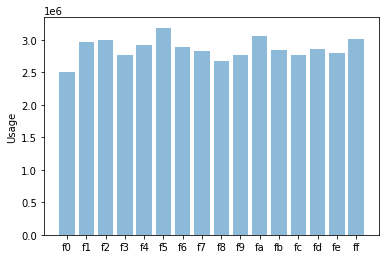

In [62]:
for item in chunks(data, 16):
    print(item)
    names = list(item.keys())
    values = list(item.values())

    y_pos = np.arange(len(names))
    plt.bar(y_pos,values, align='center', alpha=0.5)
    plt.xticks(y_pos, names)
    plt.ylabel('Usage')
    plt.show() 

In [ ]:
names = list(data.keys())
values = list(data.values())

y_pos = np.arange(len(names))
plt.bar(y_pos,values, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Usage')
plt.show() 